# pysde: Python Solver for Stochastic Differential Equations
by Chu-Ching Huang

### Abstract

As an alternative to proprietary CAS, Matlab and Maple, open source language Python and its packages have potential for doing professional computational
work.  This article describes a Python module for solving stochastic differential equations
(SDEs): pysde makes available a) symbolic solvers for SDEs; b) stochastic numerical schemes,
Euler and Milstein methods; c) and visualization tools for calculated data and Feynman-
Kac simulation etc.

**pysde** is presented here with a Jupyter Python 3 notebook.

_Keywords:_ Stochastic Differential Equations (SDEs), pysde, Euler and Milstein
Schemes, Jupyter, Python 3

### Required packages

In [1]:
from sympy import *
from pysde import *

# 1. Introduction

Differential equations are used to illustrate the evolution of a system.  Stochastic differential equations (SDEs) arise when a random noise (or white noise) is introduced into differential equations.  The white noise process, $X_t$, is formally defined as the derivative of the Brownian motion, $B(t)$:

$$X_t={{d\over{dt}} B(t)}$$

It stands for phenomenon of the violent changes in a system or unpredictable observed data.
The theory of SDEs is popular in both theoretical and applied science.  However, white noise does not exist as a function of $t$ in classical analysis since the trajectory of a Brownian motion which is nowhere differentiable.

During the middle of the last century, Japanese mathematician K. Itô and Russian mathematician
Stratanovich established the theory of stochastic calculus which could compute calculus over
such processes and their generalizations. An overly theoretical approach to stochastic calculus results in a steep learning curve for this field.  Some researchers have developed  computer packages able to do stochastic calculus. These have not resulted in wide adoption for various reasons such as unpopular development language (Axiom, see Kendall) or proprietary software (Maple, see Cyganowski). For this reason we have decided to implement in Python 3 a computer package
to do stochastic calculus and solve SDEs.

Stochastic differential equations (SDE’s) play an important role in stochastic modeling. For
example: in economics, solutions of the SDE’s are used to model share prices; in biology, solutions of SDE’s describe sizes of populations.

Python is an open-source object oriented interpreter language with a large number of libraries, or extensions, for interactive computing, numerical analysis and visualization.

We apply Python in quantitative work in scientific research to do
* Solving models via optimization
* Estimation and data manipulation
* Simulation
* Visualization of results

Python provides us with:
* Clean syntax easy to work with
* Expressions, conditions, loops, etc.
* Data types (numbers, lists, etc.)
* Program structure (functions, objects, modules, etc.)
* Numerical methods (Scipy/Numpy):
    - Working with arrays
    - Linear algebra
    - Random number generation
    - Numerical integration and numerical optimization etc;
* Symbolic calculation (Sympy):
    - Basic Calculus operation
    - Solvers for Ordinary differential equations (ODEs) and Algebraic equationminimums;
    - Mathematics Expression
* Visualization (Matplotlib, Gephi):
    - 2D/3D pictures
    - Animation

Jupyter interactive notebooks allow us to freely mix text, mathematics and graphics.  Jupyter notebooks can be exported to LaTeX to create high-quality typeset documents.

## 2. Itô and Stratonovich stochastic differential equations

Itô and Stratonovich developed two different formulations for differentiation over white noise with different mathematical meanings. Itô's version uses the left rule to present the differential term of Brownian motion, $dB_t$.   Stratonovich uses the middle rule. We use different expressions for the two different kinds of one dimensional SDEs:

**Itô version**

$$dX_t=a(t,X_t)dt+b(t,X_t) dW_t$$

**Stratonovich version**

$$dXt=\tilde{a}(X_t)dt+b(t,X_t)\circ dW_t$$

The $dt$ coefficient is called the _drift_ and the $dW_t$ coefficient is called the _diffusion_.  Both the solutions $X_t$ are the same when:

$$\tilde{a}(t,x)=a(t,x)-{1\over2} b(t,x) {\partial{b}\over\partial{x}}(t,x)$$

or conversely

$$a(t,x)=\tilde{a}(t,x)+{1\over2} b(t,x) {\partial{b}\over\partial{x}}(t,x)$$

The Stratonovich SDE uses the midpoint rule for stochastic integration and has the result just like a deterministic
integral, for instance

$$\int_0^T W_t \circ dW_t={1\over2}W_T^2$$

Itô SDE uses left sum rule to define stochastic integral and has the result:

$$\int_0^T W_t dW_t={1\over2}W_T^2-{1\over2}T$$

Linear SDEs can be solved directly by the Itô rule. For more complicated case, the SDE can
be transformed from Itô SDE into Stratonovich SDE, which can be solved by the rules applying to
deterministic calculus.

## 3. Solvable Stratonovich SDEs and their Itô equivalents

### Case $dX_t=b(X_t)\circ dW_t$

Directly integrating SDE obtains the solution as follows:

$$X_t=\psi^{-1}(W_t+\psi(x))$$

where

$$\psi(x)=\int^x {1\over{b(s)}} ds$$
$$X_0=x$$

The above Stratonovich SDE is equivalent to the following Itô SDE:

$$dX_t={1\over2}b(X_t)b'(X_t)dt+b(X_t)dW_t$$

So this class of Itô SDE is solvable.

#### Example $b(x)=x^m$ for $m$ a positive integer. We directly use sympy’s ODE solver to solve this:

In [2]:
W,m=symbols("W m")
X=Function("X")
b=X(W)**m
X_prime=Derivative(X(W),W)
sol=dsolve(X_prime-b,X(W))
show(sol[0])
show(sol[1])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Case $dX_t=\alpha(t)b(X_t)dt+b(X_t)\circ dW_t$

The solution is

$${1\over{b(X_t)}} dX_t = \alpha(t)dt+1\circ dW_t$$

so

$$\psi(X_t)-\psi(X_0)=\int^t \alpha(s)ds+W_t$$

so

$$X_t=\psi^{-1}\left( \int^t \alpha(s)ds + W_t + \psi(X_0) \right)$$

where $\psi$  and $X_0$ are the same as defined in previous case. In other words, it is the solution of the following Itô SDE:

$$dX_t=\left( \alpha(t) b(X_t) + {1\over2} b(X_t) b'(X_t) \right) dt + b(X_t) dW_t $$

#### Example $\alpha(t)=a; b(x)=x^2; X_0=x$

The solution using **sympy** is

In [3]:
a,x,t,C,W=symbols("a x t C W")
fac=a*t+W
sol=solve(integrate(1/x**2,x)+C-fac,x)
show(Eq(x,sol[0]))

<IPython.core.display.Math object>

## 4. Solvable linear Itô SDEs

The theory of existence and uniqueness of solution of linear SDEs can be found in the studies (Øksendal, Klebaner). The solution for linear SDEs is implemented in **pysde** with function **SDE_solver**.

### Case $dX_t=(a_1(t)X_t+a_2(t))dt+(b_1(t)X_t+b_2(t)) dW_t$

By method of integrating factor, the solution of this linear SDE is:

$$X_t=\Phi_{t_0,t}(X_{t_0}+
\int_{t_0}^t \Phi_{t_0,s}^{-1}(a_{2}(s)-b_1(s) b_2(s))ds + 
\int_{t_0}^t \Phi_{t_0,s}^{-1}  b_2(s)dW_s$$

where the integrating factor is:

$$\Phi_{t_0,t}=\exp\left(\int_{t_0}^t \left( a_1(s)-{b_1^2(s)\over2}\right) ds+\int_{t_0}^t b_1(s)dW_s\right)$$

#### Example $a_1(t)=a_2(t)=b_1(t)=0; b_2(t)=1; X_0=1$

Solution:

In [4]:
x,t,w=symbols('x t w')
sol1=SDE_solver(0,1,0,1)
show(Eq(x(t,w),sol1))

<IPython.core.display.Math object>

#### Example $a_1(t)=0; a_2(t)=\gamma; b_1(t)=b; b_2(t)=0; b\in\Re$

$$X_t=F_t^{-1} X_0+F_t^{-1} \int_0^t \gamma F_s ds$$

with integrating factor

$$F_t= \exp{ \left( -b W_t+{1\over2} b^2 t \right) }$$

#### Example $a_1(t)=1; a_2(t)=0; b_1(t)=1; b_2(t)=0; X_0\in\Re$

The solution is $\exp{(W_t+{t\over2})}$. From the Stratonovich approach, above SDE becomes:

$$dX_t={1\over2}X_t dt+X_t\circ dW_t$$

We can solve Stratonovich SDE using techniques of classical ordinary differential equation.  We solve the Stratonovich SDE by the method of separating variables:

$${1\over{X_t}} dX_t = {1\over2}dt+1\circ dW_t = {1\over2}dt+dW_t$$

so

$$X_t=x+\exp{ \left({1\over2}t+W_t \right)}$$

By **pysde**, we reproduce the above solution:

In [5]:
t0,x0=symbols('t0 x0')
sol=SDE_solver(x,x,0,x0)
show(Eq(x(t,w),sol))

<IPython.core.display.Math object>

### Case $dX_t=(a_1(t)X_t+a_2(t))dt+(b_1(t)X_t+b_2(t)) dW_t$

#### Example $a_1(x)={2\over{1+t}}; a_2(x)=-a(1+t)^2; b_1(t)=0; b_2(t)=a(1+t)^2; t(0)=t_0;X_0=x_0; a>0$

By **pysde**, the solution is:

In [6]:
x,dx,w,dw,t,dt,a,x0,t0,W,X=symbols('x dx w dw t dt a x0 t0 W X')
drift=2*x/(1+t)-a*(1+t)**2
diffusion=a*(1+t)**2
sol=SDE_solver(drift,diffusion,t0,x0)
show(Eq(X(W,t),sol.subs({w:W})))

<IPython.core.display.Math object>

#### Example $a_1(x)={2\over{t-1}}; a_2(x)=0; b_1(t)=0; b_2(t)=\sqrt{t(1-t)}0\leq t<1; X_0=x_0$

By **pysde**, the resulting solution is a Gaussian process:

In [7]:
drift=-2*x/(1+t)
diffusion=sqrt(t*(1-t))
sol=SDE_solver(drift,diffusion,t0,x0)
show(sol)

<IPython.core.display.Math object>

$N(·)$ is a class which is defined in the pysde module and represents the Gaussian process.

### Case $dX_t = \gamma(t,X_t) dt + b(t) X_t dW_t$

Define

$$Y_t(\omega)=F_t(\omega) X_t(\omega)$$

where integrating factor

$$F_t=\exp{ 
    \left( -\int_0^t b(s) dW_t+ {1\over2} \int_0^t b^2(s) ds 
    \right) 
          }$$

Then $Y_t(\omega)$ satisfies the ordinary differential equation:

$$Y_0=x$$
$${{d Y_t(\omega)}\over{dt}} = F_t(\omega) \gamma(t,F_t^{-1}(\omega) Y_t(\omega))$$

and $$X_t = F^{- 1}_t Y_t$$

#### Example  $\gamma(t,x)={{a t}\over x}; b(t)=b$

Solution using **sympy**:

In [8]:
W =Symbol("W")
X = Function("X")(W)
a,b=symbols("a b")
A=a*t/X
B=b*X
sol=Reduce2(A,B)
show(sol)

<IPython.core.display.Math object>

#### Example $\gamma(t,x)={1\over x}; b(t)=b; X_0>0$

Let

$$F_t=\exp{ \left( -b W_t+{1\over2} b^2 t \right) } $$

and

$${{dY_t(\omega)}\over{dt}} = {{F_t}\over{X_t}} = {{F_t^2}\over{Y_t}}$$

so

$$Y_t^2(\omega)=x^2+2 \int_0^t \exp{ \left( -2b W_s+b^2 s \right)} ds$$

so

$$X_t(\omega) = F_t^{-1}(\omega) Y_t(\omega)
= \exp{ \left( b W_t - {1\over2} b^2 t \right)}
\sqrt{x^2 + 2 \int_0^t \exp{(-2 b W_s+b^2 s)} ds}$$

#### Example $\gamma(t,x)=r x(K-x); b(t)=b; X_0>0; K>0,r,b\in\Re$

Define integrating factor, $F_t$, as follows (Gard):

$$F_t=\exp{\left( (-r K+{1\over2}b^2)t-b W_t \right)}$$

Then the SDE of $Y_t=F_t X_t$ satisfies the following ODE:

$$dY_t=F_t dX_t+X_t dF_t+[X_t,F_t]$$
$$=F_t (r X_t(K-X_t) dt+b X_t dW_t)+((-{r\over K}+{{b^2}\over 2})dt-b dW_t)X_t F_t
+{1\over2}(-b F_t)(b X_t)dt$$
$$={-r \over{F_t}}{Y_t^2}$$

where $[ •, •]$ is the quadratic variation [Klebaner]. The solution of SDE is thus:

$$X_t = {{
\exp{((r K-{{b^2}\over2})t+b W_t)}
}\over{
x^{-1}+r \int_0^t \exp{((r K-{{b^2}\over2})s+b W_s)} ds
}}$$

#### Example $\gamma(t,x)=\kappa x(\alpha-\ln{x}); b(t)=\sigma; X_0=x; \kappa,\alpha\sigma>0$

Then

$$dY_t = {1\over{X_t}} dX_t - {1\over2} \sigma^2 dt= \kappa(\alpha-Y_t-{{\sigma^2}\over{2\kappa}}) dt + \sigma dW_t$$

So

$$dY_t+\kappa Y_t dt = \kappa \left(\alpha - {{\sigma^2}\over{2 \kappa}} \right) dt + \sigma dW_t$$

So

$$d(e^{\kappa t} Y_t) = e^{\kappa t} \left(\kappa 
         \left( \alpha - {{\sigma^2}\over{2 \kappa}} \right) dt + 
         \sigma dW_t \right)$$

So

$$e^{\kappa t} Y_t-\ln{x}=
\int_0^t e^{\kappa s} \left(\kappa 
         \left( \alpha - {{\sigma^2}\over{2 \kappa}} \right) ds + 
         \sigma dW_s \right) ds$$

This implies:

$$X_t=\exp{
\left(
e^{-\kappa t} \ln{x} +
\left(\alpha-{{\sigma^2}\over{2 \kappa}} \right) (1-e^{\kappa t}) +
\sigma e^{-\kappa t} \int_0^t e^{\kappa s} dW_s
\right)
}$$ 

The constant in the last result is:

$$X_0=x= \exp{\left( bW_0-{1\over 2}b^2 \times 0 \right)}
\sqrt{C1+2 \int_0^0 \exp{(-2 b W_s+b^2 s)}} ds$$
$$ = \sqrt{C1}$$

so

$$C1=x^2$$

One of advantages of Python language is that supports namespaces. It is very useful to declare
variable $x$ and define function $Y$ in Python programming with the same meaning as in mathematics.  Sympy package gives us the “Symbol/symbols” methods for declaring variables names and the “Function” method for declaring function names.  We use these features to express in **sympy** the solution to the above equation:

In [9]:
r,W,b=symbols('gamma W, b')
X=Function('X')
r=1/X(W)
F=exp(-integrate(b,W)+integrate(b*b,t)/2)
Y=Function('Y')(t)
WW=Function('WW')(t)
rr=r.subs({X(W):Y/F})
Y_prime=Derivative(Y,t)
rrr=(rr*F).subs({W:WW})
sol=dsolve(Y_prime-rrr,Y)
show(sol[1].subs({WW:W}))

<IPython.core.display.Math object>

## 5. Solution of Komolgorov Forward PDE

The solution of the SDE

$$dX_t = \mu(X_t) dt + \sigma(X_t) dW_t$$

is a process with which its probability density function, $f(x, t)$, satisfies Komolgorov's forward equation:

$$\frac{\partial f}{\partial t} = \frac{\partial \mu(x)f(t,x)}{\partial x} +\frac{\partial^2 (\sigma^2(x)f(x,t))}{\partial x^2}$$

Generally, an explicit solution is not solvable.  However, it is quiet easy to discuss the probability
density function as it has reached its equilibrium. The stationary solution of probability density
function is given by Wright’s formula:

$$ f(x)=\frac{\phi}{\sigma^2}\exp\left({\int^x\frac{\mu(s)}{\sigma^2(s)}d s}\right) $$

where $\phi$ is chosen so as to make $\int^{\infty}_{-\infty}f(x) d x=1$.

**pysde** provides the function $KolmogorovFE_Spdf(μ,\sigma^2[,a,b])$ to solve the stationary probability
density function, $f(x)$. The optional $[a,b]$ is $[−∞,∞]$ by default. We consider three cases, where $r,\epsilon > 0$: normal, Gamma and Beta case.

####  Normal case

The pdf of $X$ which satisfies  $dX_t = r(G-X_t) dt + \sqrt{\epsilon} dW_t$ is:

In [10]:
x,dx=symbols('x dx')
r,G,e,d=symbols('r G epsilon delta')
show(KolmogorovFE_Spdf(r*(G-x),e))

<IPython.core.display.Math object>

#### Gamma case

The pdf of $X$ which satisfies $dX_t = r(G-X_t) dt + \sqrt{\epsilon X_t} dW_t$ is

In [11]:
show(KolmogorovFE_Spdf(r*(G-x),e*x,0,oo))

<IPython.core.display.Math object>

#### Beta case

The pdf of X which satisfies $dX_t = r(G-X_t) dt + \sqrt{\epsilon X_t(1-X_t)} dW_t$ is:

In [12]:
l=KolmogorovFE_Spdf(r*(G-x),e*x*(1-x),0,1)
show(l.subs({e:r*d}))

<IPython.core.display.Math object>

## 6. Solution of Kolmogorov backward PDE

Consider general SDE,

$$t\leq s \leq T$$
$$X_t=x$$
$$dX_s=\mu(s,X_s)ds+\sigma(s,X_s)dW_s$$

Suppose that solution of equations is $X_s^{(t,x)}$.  Then 
$u(t,T , x)=E[\phi(X_T)|X_t=x]=E[\phi(X_T^{(t,x)})]$ would satisfy the following Kolmogorov backward partial differential equation:

$$u(T,T,x)=\phi(x)$$
$$(u,t,t,x)=\phi(x)$$
$${\partial{u}\over\partial{t}}+
\mu(t,x) {\partial{u}\over\partial{x}}+
{1\over2}\sigma^2(t,x) {\partial^2{u}\over\partial{x^2}} = 0$$
$${\partial{u}\over\partial{t}}-
\mu(t,x) {\partial{u}\over\partial{x}}-
{1\over2}\sigma^2(t,x) {\partial^2{u}\over\partial{x^2}} = 0$$

where $\phi(x)$ is smooth.

For example, suppose that $u(t, T , x)$ satisfies the following pde:

$$u(T,T,x)=e^{{-x^2}\over2}$$
$${\partial{u}\over\partial{t}} +
{1\over2} {\partial^2{u}\over\partial{x^2}} = 0$$

This implies $\mu=0$, $\sigma=1$ and $dX_s=dW_x$ so 
$X_u=x+W_u-W_t$.

Therefore, the solution of PDE can be derived as follows:

$$u(t,T,x)=E[e^{-X_T^2/2}|X_t=x]$$
$$=E[\exp{(-(x+W_T-W_t)^2/2)}]$$
$$=\int_{-\infty}{\infty} e^{-(x+y)^2/2}
{1\over{\sqrt{2 \pi(T-t)}}}
e^{-{y^2}\over{2(T-t)}} dy$$
$$= {1\over\sqrt{T-t+1}} e^{-{{x^2}\over{2(T-t+1)}}}$$

since the distribution of $W_T-W_t+x$ is ${\cal N}(x,T-t)$.  The full steps of pde solver in **pysde**
could be simply implemented by solving SDE for $X_t$, and evaluating the conditional expectation
as follows:

In [13]:
T=Symbol('T')
sol=SDE_solver(0,1,t,x)
func=sol**2-w**2/2/(T-t)
l=normal_int(func,w)
show(simplify(1/sqrt(2*pi*(T-t))))

<IPython.core.display.Math object>

**pysde** implements function **normal_int** to
evaluate integrals of functions of form $\exp{(Ax^2+Bx+C)}$, since it is necessary in evaluating
probability of function involving Wiener processes but isn't solvable by Sympy’s **integrate**
function.

## 7. Euler and Milstein discretization schemes

Using **pysde** we show how to compute Euler and Milstein discretizations of $dX_t=-X_t dt+X_t dW_t$ with $X_0=1$:

In [14]:
x,dx=symbols('x dx')
(drift,diffusion)=(-x,x)
nt=1000
x0=1.;t0=0.;tn=10.
T=linspace(t0, tn, nt+1)
X=Euler(drift,diffusion,x0,t0,tn,nt)
X,Y=Milstein(drift,diffusion,x0,t0,tn,nt)

Using Python's **matplotlib** package we can then plot these paths:

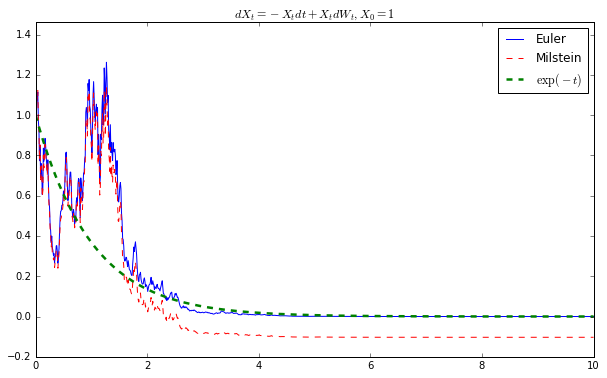

In [15]:
%matplotlib inline
import matplotlib.pylab as plt
plt.figure(figsize=(10,6))
plt.plot(T, X, color="blue", linestyle="-", label="Euler")
plt.plot(T, Y, color="red", linestyle="--", label="Milstein")
plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")
plt.ylim(X.min()-0.2, X.max()+0.2)
plt.title(r"$d X_t=-X_t dt+X_td W_t,X_0=1$")
plt.legend();

## 8. Conclusion

The focus of our research was to develop a computer package for solving SDEs. To accomplish our
objective we investigated the use of Python which
allows us to formulate mathematics and provides high-performance functionality for computation.
Our investigation centered on symbolic SDEs solver and integrated working environment
with interactivity and publishing system.

Stochastic differential equations frequently appear in quantitative analysis. pysde provides the solvers for SDEs, stationary probability density function, numerical schemes and visualization. With pysde, it is relatively easy to derive the probability
density function of the dependent variable as it has reached statistical equilibrium.

#### Acknowledgments

This article is supported by NSC project and METO.

## References

#### Theory of Stochastic Calculus

* Cobb, Loren, Stochastic Differential Equations for the Social Sciences, Mathematical Frontier
of the Social and Policy Sciences, Cobb and Thraill eds.,Westview Press, 1981.
* Gard, T.C.  Introduction to Stochastic Differential Equation, Dekker, 1988.
* Klebaner, Fima C. Introduction to Stochastic Calculus with Applications, 2nd Ed., Imperial
College Press, 2004.
* Øksendal, Bernt, Stochastic Differential Equations, An Introduction with Applications, 6th Ed., Springer-Verlag, 2007.
* Wright, Swell. The distribution of Gene Frequencies under Irreversible Mutation. Proc. Nat’l.
Acad. Sci., 24, 1938,253-259.


#### Computational Stochastic Calculus

* [Cyganowski, S., Grüne, L., Kloeden, P.E., MAPLE for Stochastic Differential Equations](num.math.uni-bayreuth.de/en/...et_al_maple.../gruene_et_al_maple_sde_2001.pdf)
* [Kendall,W.S.: Symbolic Ito calculus in AXIOM: an ongoing story](   http://www.warwick.ac.uk/statsdept/staff/WSK/abstracts.html#327)